# Introduction :

In additional to plotting data points from this project we must often fit them to theoretical model to extract important parameters.



In this project will serve as a guide on how to fit a set of point to a known model equation ,which we will do using the
(scipy.optimize .curve_fit function).





In this project using the 2 basic non linear fittings
1) exponential
2) gaussian


Both plotting and curvefitting are used in this project.

##  0.1 Generating the data with noise

In [2]:
import matplotlib.pyplot as plt              ### we import the library which will be use matplot,numpy is needed just for plotting purpose
import numpy as np

In [3]:
from scipy.optimize import curve_fit     ### which is used for curve fit function

In this case, we are only using one specific function from the scipy package, so we can directly import just curve_fit .


In [5]:
# Function to calculate the exponential with constants a, b,c

In [6]:
def func(x,a,b,c):                   # general(exponential) function
    return (a*np.exp(-b*x) + c)

### The noise() function is an inbuilt function in the python.


noise(noise_type , attenuate, channel)


####### parameters : these function accepts the three parameters 
1) noise_type ==== These parameter store the noise type some of the available noise type are gaussian,uniform etc
























2)attenaute===== These parameter store the rate of distribution.


























3)channel===== These parameter store the channel type as "red","green"


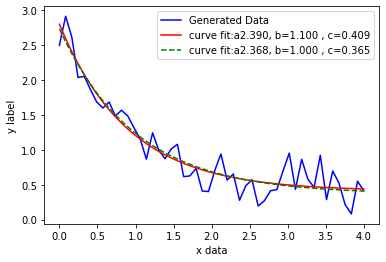

In [4]:
xdata = np.linspace(0,4,50)

y = func(xdata,2.5,1.3,0.5)

rng = np.random.default_rng()            ##  Here the noise function are used for random gaussian data
                                        
y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y+y_noise


plt.plot(xdata , ydata, 'b-' , label = 'Generated Data')

popt,pcov = curve_fit(func,xdata,ydata)
plt.plot(xdata ,func(xdata,*popt),'r-' , label = 'curve fit:a%5.3f, b=%5.3f , c=%5.3f' % tuple(popt))  

# These is the syntax of the curve_fit
popt,pcov = curve_fit(func,xdata,ydata ,bounds=(0,[3.0,1.0,0.5]))
plt.plot(xdata ,func(xdata,*popt),'g--' ,label= 'curve fit:a%5.3f, b=%5.3f , c=%5.3f' % tuple(popt))
         
         
plt.xlabel('x data')
plt.ylabel('y label')
plt.legend()
plt.show()


## 0.2 Another example with gaussian curve fitting 

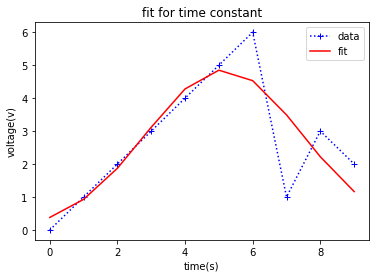

In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit         
import numpy as np

x = np.arange(10)                                  
y = np.array([0,1,2,3,4,5,6,1,3,2])

# weighted arithmatic mean(corrected - check the section below)

mean  = sum(x * y) /sum(y)
sigma = np.sqrt(sum(y*(x-mean)**2)/sum(y))

def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))         

popt,pcov = curve_fit(gauss ,x,y,p0=[max(y),mean,sigma])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gauss(x,*popt),'r-',label='fit')
plt.legend()
plt.title('fit for time constant') 
plt.xlabel('time(s)')
plt.ylabel('voltage(v)')
plt.show()


         
    


## plotting single file data with best fit curves.


## plotting text file data with lognormal fitting curves.

In [8]:
# define the true objective mathematical distribution function to be fitted over the data files


def lognorm(x,mu,sigma):               ##create the function and define it
    return 1/(np.sqrt(2*np.pi)*sigma*x)*np.exp(-((np.log(x)-mu)**2)/(2*sigma**2))

In [9]:
# importing the libabries
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np

In [10]:
# load data set
data = np.loadtxt('file_1.txt')

# choose the input and output variables
x,y = data[:,0], data[:,1]

In [11]:
# curve fit

popt,_ = curve_fit(lognorm,x,y)
# summarise the parameter value
mu,sigma = popt

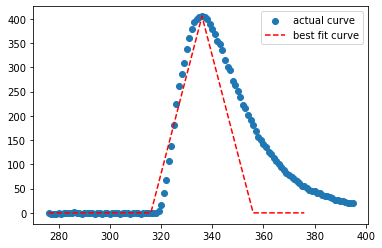

In [12]:
# plot input vs output
plt.scatter(x,y)

# define a sequence of input between the smallest and the largest known input
x_line = arange(min(x) ,max(x),20)


#calculate the out for a range
y_line = lognorm(x_line,mu,sigma)

# create line plot for a mapping function
plt.plot(x_line,y_line,'--',color='red')
plt.legend(["actual curve","best fit curve"] ,loc="best")
plt.show()

## plotting text data file with the gaussian fitting curves

In [13]:
# load data set
data = np.loadtxt('file_1.txt')

# choose the input and output variables
x,y = data[:,0], data[:,1]

In [14]:
def gauss(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

x1 = np.array(x)
n = len(x1)
mean = sum(x*y)/sum(y)
sigma = sum(y*(x-mean)**2)/sum(y)
print(mean,sigma)


popt,pcov = curve_fit(gauss,x,y,p0=[1,mean,sigma])

345.3212747631352 226.84980531680444


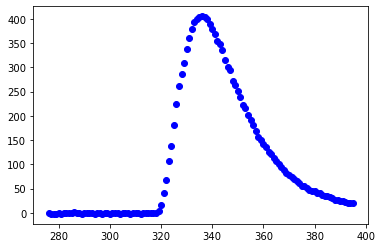

In [15]:
plt.plot(x,y,'ob',label = 'data')

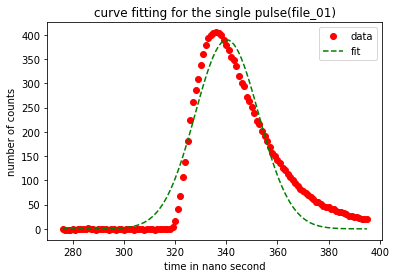

In [16]:
plt.plot(x,y,'ro' ,label = 'data')
plt.plot(x,gauss(x,*popt),'g--',label='fit')
plt.legend()
plt.title('curve fitting for the single pulse(file_01)')
plt.xlabel('time in nano second')
plt.ylabel('number of counts')
plt.show()

##  multiple text file handling and visualizing

In [17]:
pwd

'C:\\Users\\Rutuja Mali'

[264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0, 299.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 316.0, 317.0, 318.0, 319.0, 320.0, 321.0, 322.0, 323.0, 324.0, 325.0, 326.0, 327.0, 328.0, 329.0, 330.0, 331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337.0, 338.0, 339.0, 340.0, 341.0, 342.0, 343.0, 344.0, 345.0, 346.0, 347.0, 348.0, 349.0, 350.0, 351.0, 352.0, 353.0, 354.0, 355.0, 356.0, 357.0, 358.0, 359.0, 360.0, 361.0, 362.0, 363.0, 364.0, 365.0, 366.0, 367.0, 368.0, 369.0, 370.0, 371.0, 372.0, 373.0, 374.0, 375.0, 376.0, 377.0, 378.0, 379.0, 380.0, 381.0, 382.0, 383.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0

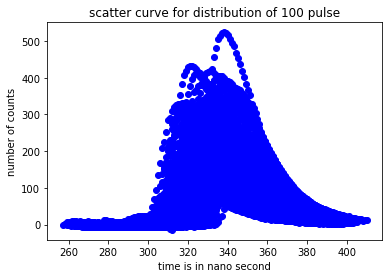

In [21]:
mypath ="C:/Users/Rutuja Mali"
import os
os.chdir(mypath)
x = list()
y = list()
Tmax2 = list()
Tmin2 = list()
filenames=list()
rise = list()
decay = list()



for i in range (0,100):
    filenames.append('file_'+str(i)+'.txt')
for a in filenames:
    temp=list()
    for b in open(a):
        
        temp=b.split()
        x.append(float(temp[0]))
        y.append(float(temp[1]))
    
    
    
for i in range (0,len(x)-1):
    smallest = i
    for j in range(i + 1,len(x)):
        if x[j] < x[smallest]:
            smallest = j
            
x[i], x[smallest] = x[smallest],x[i]
y[i],y[smallest] = y[smallest],y[i]
print(x)
print(y)
print()
plt.scatter(x,y,color='blue')
plt.title('scatter curve for distribution of 100 pulse')
plt.xlabel('time is in nano second')
plt.ylabel('number of counts')
plt.show()

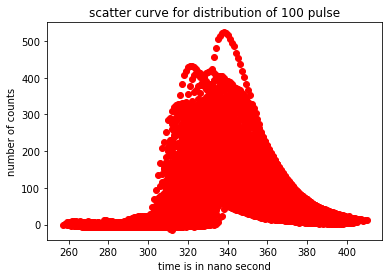

In [22]:
plt.scatter(x,y,color='red')
plt.title('scatter curve for distribution of 100 pulse')
plt.xlabel('time is in nano second')
plt.ylabel('number of counts')
plt.show()

# Conclusion :

#### 1) In this project we also learn about how to plots curve fit ,how to handle the single text file as well as handling the multiple text file. 

####  2) also we learn the why curvefit is important .
Fitted curves can be used as an aid for data visualization, to infer values of a function where no data are available, and to summarize the relationships among two or more variables.

